<a href="https://colab.research.google.com/github/albertochumpitazi/Master_VIU_AlbertoChumpitazi/blob/main/04_MineriaDatos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <center>  <center>
## <center> Universidad Internacional de Valencia (VIU) <center>
## <center> Trabajo Fin de Master (TFM) <center>


---


# <center> **Extracción de patrones de comportamiento de consumo de energía de los hogares en una red inteligente** <center>


---



**Titulación:** Máster en Big Data y Data Science

**Alumno:** Alberto Sergio Chumpitazi Llave

**Director:** Jose Carlos González, PhD.

#4.4. Mineria de Datos

#Clustering

In [1]:
!pip install kneed
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LinearRegression
import kneed

paleta_desCluster = {
    'Bajo Consumo': '#CD6155',
    'Alto Consumo': '#A569BD'
}

paleta_cluster = {
    0: '#CD6155',
    1: '#A569BD',
    2: '#45B39D',
    3: '#F4D03F',
    4: '#95A5A6',
}

paleta_estaciones = {
    'Invierno2': ((1, 1), (3, 20)),
    '2.Primavera': ((3, 21), (6, 20)),
    '3.Verano': ((6, 21), (9, 22)),
    '4.Otoño': ((9, 23), (12, 20)),
    '1.Invierno': ((12, 21), (12, 31))
}

warnings.filterwarnings('ignore')

cTotal = ['Total Consumo']
cTemp = ['Temp']
cArtefactos1 = ['Dish washer', 'Washing Machine', 'Dryer']
cArtefactos2 = ['Water heater', 'TV', 'Microwave' ]
cArtefactos3 = ['Kettle','Lighting','Refrigerator']
cHorario = [ 't_1.Madrugada',	't_2.Mañana','t_3.Tarde','t_4.Noche']
cEstacion = ['e_1.Invierno', 'e_2.Primavera', 'e_3.Verano', 'e_4.Otoño' ]

cArtefCocin = ['Cocina']
cArtefLavan = ['Lavanderia']
cArtefConti = ['Continuo']
cArtefEspac = ['EspacioComun']
cArtefEntre = ['Entretenimiento']

#cArtefactos = cArtefactos1 + cArtefactos2 + cArtefactos3
cArtefactos = cArtefCocin + cArtefLavan + cArtefConti + cArtefEspac + cArtefEntre
cArtefactosTemp  = cArtefactos  + cTemp

def normalizar(df, columnas, tipoNorm ):
  dftmp = df.copy()
  for columna in columnas:
    df_filtrado = dftmp[dftmp[columna] != 0]
    if (tipoNorm == "MinMaxScaler"):
      dfNorm = preprocessing.MinMaxScaler().fit_transform(df_filtrado[[columna]])
      dftmp.loc[dftmp[columna] != 0, columna] = dfNorm
    if (tipoNorm == "Normalizer"):
      dfNorm = preprocessing.Normalizer().fit_transform(df_filtrado[[columna]])
      dftmp.loc[dftmp[columna] != 0, columna] = dfNorm
    if (tipoNorm == "StandardScaler"):
      dfNorm = preprocessing.StandardScaler().fit_transform(df_filtrado[[columna]])
      dftmp.loc[dftmp[columna] != 0, columna] = dfNorm
    if (tipoNorm == "RobustScaler"):
      dfNorm = preprocessing.RobustScaler().fit_transform(df_filtrado[[columna]])
      dftmp.loc[dftmp[columna] != 0, columna] = dfNorm
  return dftmp

In [6]:
ruta_excel = '/content/drive/MyDrive/VIU/14MBID/Data/03_transformacion.csv'
df_consumidor = pd.read_csv(ruta_excel, sep=",")
df_consumidor['fecha'] = pd.to_datetime(df_consumidor['fecha'])

In [7]:
from  scipy.stats import shapiro

Cols = {
    'Variable': [],
    'TotalReg': [],
    'Media': [],
    'Mediana': [],
    'Mínimo': [],
    'Máximo': [],
    'p-valor': [],
    'DistNormal': []
}

df_dist = pd.DataFrame(Cols)
for columna in cArtefactosTemp :
# Realizar la prueba de Shapiro-Wilk
  TotalReg = len(df_consumidor[df_consumidor[columna]!=0][columna])
  # Calcular la media de la columna 'columna'
  media = df_consumidor[df_consumidor[columna]!=0][columna].mean()
  # Calcular la mediana de la columna 'columna'
  mediana = df_consumidor[df_consumidor[columna]!=0][columna].median()
  # Calcular el minimo de la columna 'columna'
  min = df_consumidor[df_consumidor[columna]!=0][columna].min()
  # Calcular el maximo de la columna 'columna'
  max = df_consumidor[df_consumidor[columna]!=0][columna].max()


  p_value = shapiro(df_consumidor[df_consumidor[columna]!=0][columna]).pvalue
  if p_value > 0.05:
    vDistNormal = 'Si'
  else:
    vDistNormal = 'No'

  nuevo_registro = pd.DataFrame({'Variable': [columna],'TotalReg':[TotalReg],'Media':[media] ,'Mediana':[mediana],'Mínimo':[min] ,'Máximo':[max] ,  'p-valor': [p_value], 'DistNormal': [vDistNormal] })
  df_dist = pd.concat([df_dist, nuevo_registro])
df_dist

Variable  TotalReg      Media   Mediana     Mínimo     Máximo  \
0           Cocina   55817.0   1.848412  1.484813   0.000104   8.876152   
0       Lavanderia   60968.0   1.424005  1.241280   0.000137   8.507444   
0         Continuo  312783.0   0.440359  0.280000   0.059000   2.887000   
0     EspacioComun   47749.0   0.668659  0.724000   0.005000   1.689500   
0  Entretenimiento   98680.0   0.220246  0.176714   0.001536   0.604856   
0             Temp  342499.0  10.142263  9.000000 -10.000000  32.000000   

   p-valor DistNormal  
0      0.0         No  
0      0.0         No  
0      0.0         No  
0      0.0         No  
0      0.0         No  
0      0.0         No

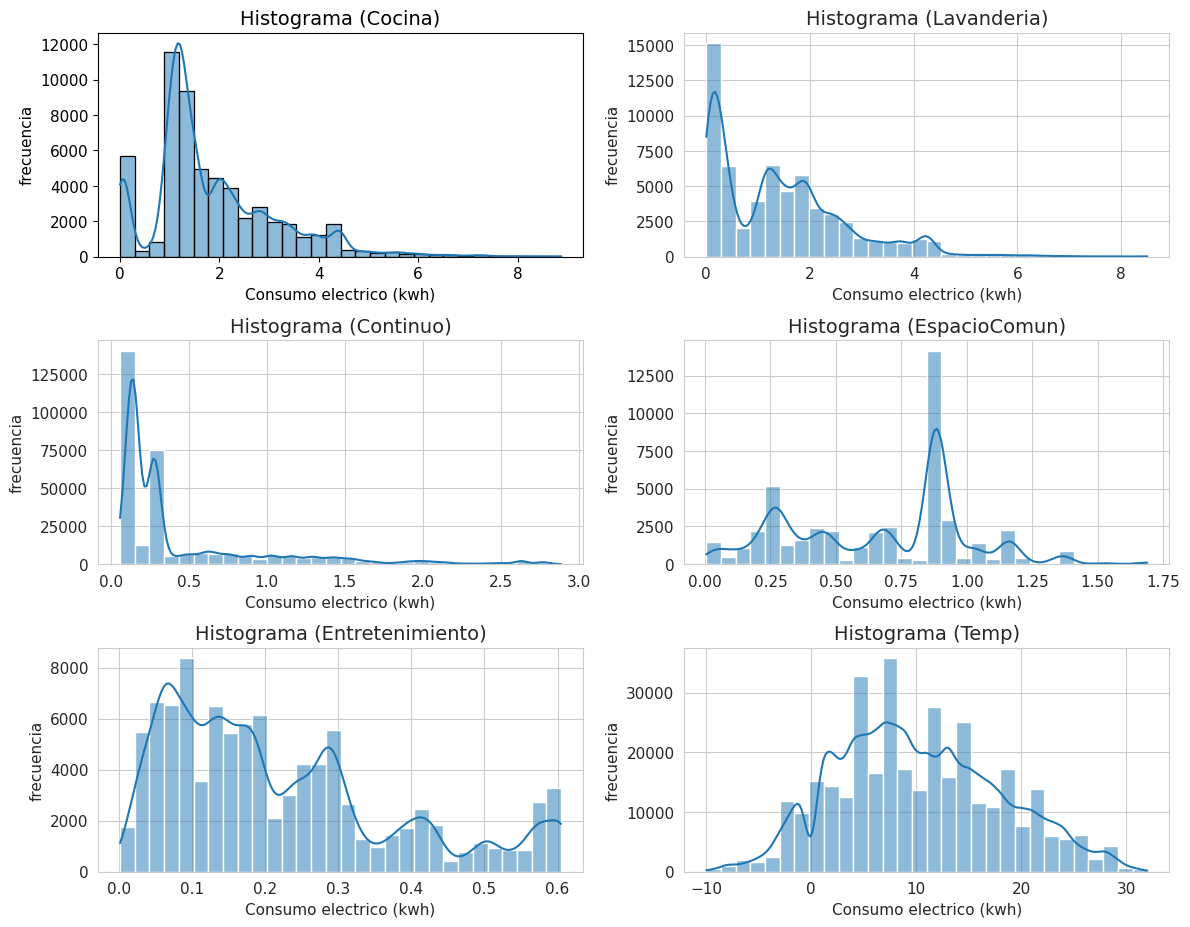

In [8]:
plt.figure(figsize=(12, 12))
i  = 1
vbins = 30
for columna in cArtefactosTemp:
  axes = plt.subplot(4, 2, i)
  sns.histplot(ax=axes, data=df_consumidor[df_consumidor[columna]!=0], x=columna,  multiple='stack', kde=True, bins=vbins)

  axes.xaxis.set_tick_params(labelsize=11)
  axes.yaxis.set_tick_params(labelsize=11)

  axes.set_title('Histograma (' + columna + ')', fontsize=14)
  axes.set_ylabel('frecuencia', fontsize=11)
  axes.set_xlabel('Consumo electrico (kwh)', fontsize=11)
  sns.set_style("whitegrid")
  plt.tight_layout()
  i = i + 1

In [12]:
df_consumidorMM = normalizar(df_consumidor, cArtefactosTemp, "MinMaxScaler")
df_consumidorRS = normalizar(df_consumidor, cArtefactosTemp, "RobustScaler")
df_consumidorMM['Total Consumo'] = df_consumidorMM[cArtefactos].sum(axis=1)
df_consumidorRS['Total Consumo'] = df_consumidorRS[cArtefactos].sum(axis=1)

Text(0, 0.5, 'Consumo Kwh')

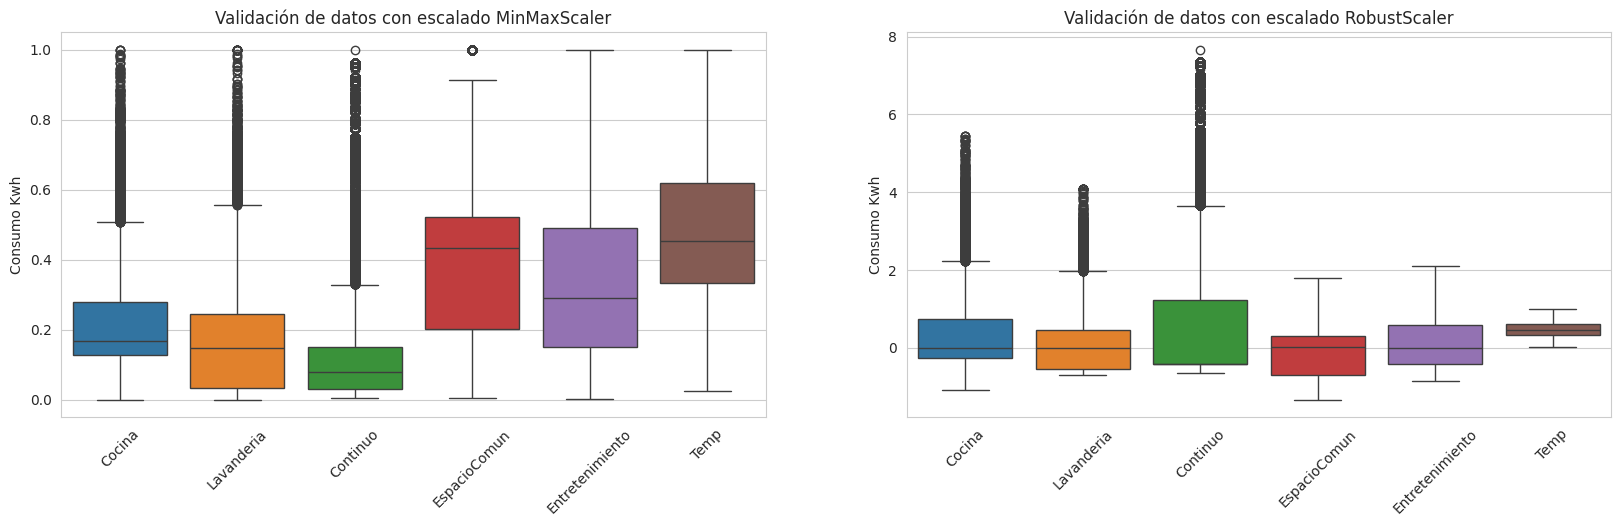

In [13]:
vpostPlot=0
plargo = 5
pancho = 20
df_out = []
axes = []
axes.append(plt.subplots)

fig1, axes[vpostPlot] = plt.subplots(1,2, figsize=(pancho,plargo))

for columna in cArtefactosTemp:
  df_out_a = df_consumidorMM[df_consumidorMM[columna] != 0][columna]
  df_out_a.reset_index(drop=True, inplace=True)
  df_out.append(df_out_a)

axplt = axes[0][0]
sns.boxplot(ax=axplt, data=df_out, orient="v")
axplt.xaxis.set_tick_params(rotation=45)
sns.set_style("whitegrid")
axplt.set_title('Validación de datos con escalado MinMaxScaler')
axplt.set_ylabel('Consumo Kwh')

#df_no_zeros  = outlier(df_no_zeros, cvar)
#df_consumidor = df_no_zeros
for columna in cArtefactos:
  df_out_a = df_consumidorRS[df_consumidorRS[columna] != 0][columna]
  df_out_a.reset_index(drop=True, inplace=True)
  df_out.append(df_out_a)

axplt = axes[0][1]
sns.boxplot(ax=axplt, data=df_out, orient="v")
axplt.xaxis.set_tick_params(rotation=45)
sns.set_style("whitegrid")
axplt.set_title('Validación de datos con escalado RobustScaler')
axplt.set_ylabel('Consumo Kwh')

In [14]:
#df_consumidor.var()
#df_consumidorMM[cArtefactosTemp].var()
df_varRS = df_consumidorRS[cArtefactosTemp].var()
df_varRS = pd.DataFrame(df_varRS)
df_varRS = df_varRS.reset_index()
df_varRS = df_varRS.rename(columns={'index': 'Artefacto'})
df_varRS = df_varRS.rename(columns={0: 'Varianza RobustScaller'})

df_varMM = df_consumidorMM[cArtefactosTemp].var()
df_varMM = pd.DataFrame(df_varMM)
df_varMM = df_varMM.reset_index()
df_varMM = df_varMM.rename(columns={'index': 'Artefacto'})
df_varMM = df_varMM.rename(columns={0: 'Varianza MinMaxScaller'})

df_compara_var = pd.merge(df_varMM, df_varRS, on=['Artefacto'], how='inner')

#df_varMM
df_compara_var

Artefacto  Varianza MinMaxScaller  Varianza RobustScaller
0           Cocina                0.008937                0.146708
1       Lavanderia                0.007760                0.087855
2         Continuo                0.031887                2.095812
3     EspacioComun                0.023428                0.053925
4  Entretenimiento                0.045508                0.175431
5             Temp                0.041519                0.407052

<Axes: >

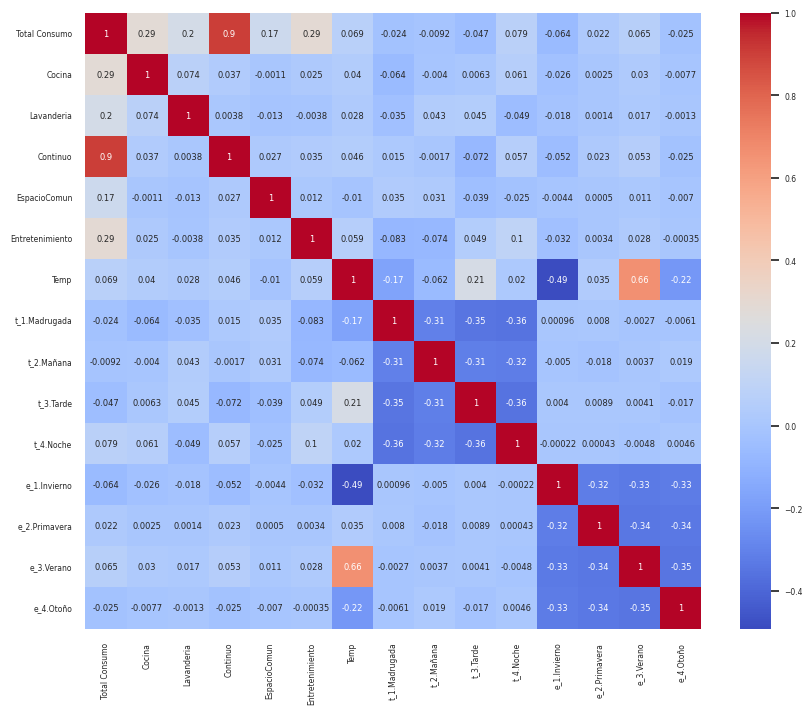

In [15]:
#var_corre = cTotal + cArtefactosTemp + cHorario
var_corre = cTotal + cArtefactosTemp + cHorario + cEstacion
df_corr = df_consumidorRS[var_corre].corr()
plt.figure(figsize=(10,8))
sns.set()
sns.set(font_scale=0.5)
sns.heatmap(df_corr, cmap='coolwarm', square=True, annot=True)


In [16]:
from sklearn.feature_selection import SelectKBest, f_regression

nroVarCorre = 3
var_corre = cTotal + cArtefactosTemp + cHorario + cEstacion

df_corr = df_consumidorRS[var_corre].corr()
# Seleccionar las características más relevantes utilizando SelectKBest y f_regression
selector = SelectKBest(score_func=f_regression, k=nroVarCorre)
# selector = SelectKBest(score_func=f_regression)
X_features = df_consumidorRS[var_corre].drop(cTotal, axis=1)
y_target = df_consumidorRS[cTotal]
X_features_selected = selector.fit_transform(X_features, y_target)
# Obtener el nombre de las características seleccionadas
var_corre_select = X_features.columns[selector.get_support(indices=True)]
print("Características seleccionadas RS:", var_corre_select)

Características seleccionadas RS: Index(['Cocina', 'Continuo', 'Entretenimiento'], dtype='object')


In [17]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

pcaMM = PCA(n_components=2)
X_pcaMM = pcaMM.fit_transform(df_consumidorMM[var_corre_select])

pcaRS = PCA(n_components=2)
X_pcaRS = pcaRS.fit_transform(df_consumidorRS[var_corre_select])

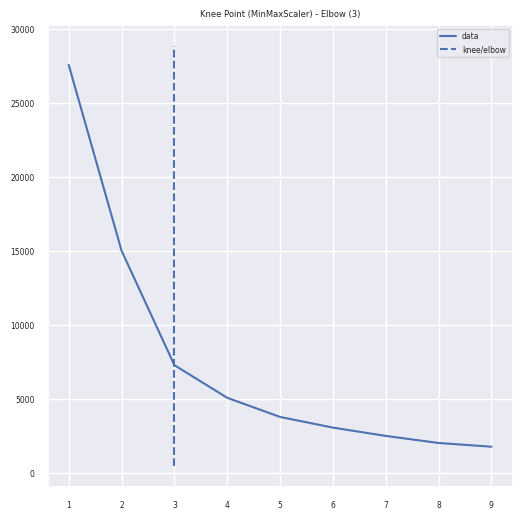

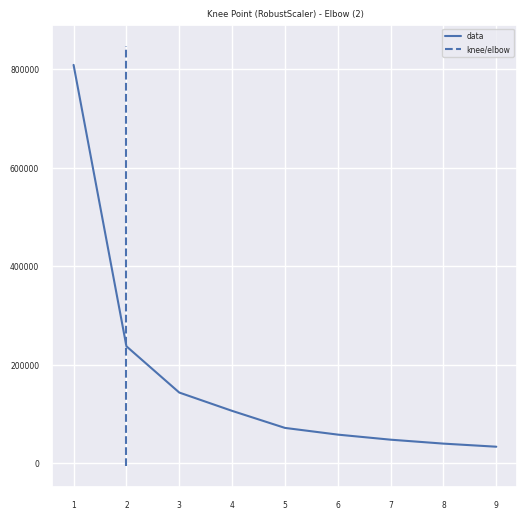

In [18]:
axes = []
vModelos = ['MinMaxScaler','RobustScaler']
elbowMod = []
pPosMod = 0

#vVar_corre.remove('Refrigerator')

for vModelo in vModelos:
  df_out = []
  if vModelo == 'MinMaxScaler':
    df_kmeans = X_pcaMM
  if vModelo == 'RobustScaler':
    df_kmeans = X_pcaRS

  num_clusters = range(1,10)
  wcss=[]
  for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(df_kmeans)
    wcss_iter = kmeans.inertia_
    wcss.append (wcss_iter)

  #plt.xticks(fontsize=10)
  #plt.yticks(fontsize=10)

  kneedle = kneed.KneeLocator(num_clusters, wcss, curve='convex', direction='decreasing')
  elbow_point = kneedle.elbow
  elbowMod.append(elbow_point)
  #print('Elbow: ', elbow_point)
  kneedle.plot_knee(title ='Knee Point (' + vModelo + ') - Elbow (' + elbow_point.astype(str) + ')')

In [20]:
kmeansMinMax = KMeans(n_clusters=elbowMod[0], random_state=42)
#kmeansMinMax.fit(X_pcaMM)
X = X_pcaMM
labels = kmeansMinMax.fit_predict(X)
df_consumidorMM['cluster_MM'] = labels
df_consumidor['cluster_MM'] = labels

kmeansRobusS = KMeans(n_clusters=elbowMod[1], random_state=42)
X = X_pcaRS
labels = kmeansRobusS.fit_predict(X)
#kmeansRobusS.fit(X_pcaRS)
df_consumidorRS['cluster_RS'] = labels
df_consumidor['cluster_RS'] = labels

In [21]:
plargo = 5
pancho = 25
axes = []
vpostPlot=0

axes.append(plt.subplots)
fig1, axes[vpostPlot] = plt.subplots(1,2, figsize=(pancho,plargo))

vposCol = 0
X_pacGraph = X_pcaMM
k_meansGraph = kmeansMinMax
sns.scatterplot(ax=axes[vpostPlot][vposCol], x= X_pacGraph[:, 0], y= X_pacGraph[:, 1], c=k_meansGraph.labels_, cmap='viridis', marker='o', edgecolors='k')
sns.scatterplot(ax=axes[vpostPlot][vposCol], x= k_meansGraph.cluster_centers_[:, 0], y= k_meansGraph.cluster_centers_[:, 1], s=100, c='red', marker='o', label='Centroides')
axes[vpostPlot][vposCol].set_title('PCA + K-Means (MinMax Scaler)')
axes[vpostPlot][vposCol].set_xlabel('PCA 1')
axes[vpostPlot][vposCol].set_ylabel('PCA 2')

vposCol = vposCol + 1
X_pacGraph = X_pcaRS
k_meansGraph = kmeansRobusS
sns.scatterplot(ax=axes[vpostPlot][vposCol], x= X_pacGraph[:, 0], y= X_pacGraph[:, 1], c=k_meansGraph.labels_, cmap='viridis', marker='o', edgecolors='k')
sns.scatterplot(ax=axes[vpostPlot][vposCol], x= k_meansGraph.cluster_centers_[:, 0], y= k_meansGraph.cluster_centers_[:, 1], s=100, c='red', marker='o', label='Centroides')
axes[vpostPlot][vposCol].set_title('PCA + K-Means (Robust Scaler)')
axes[vpostPlot][vposCol].set_xlabel('PCA 1')
axes[vpostPlot][vposCol].set_ylabel('PCA 2')

Text(0, 0.5, 'PCA 2')

In [23]:
from google.colab import files
df_consumidor.to_csv('04_cluster_general.csv', header=True, index=False)
df_consumidorRS.to_csv('04_cluster_general_RS.csv', header=True, index=False)
files.download('04_cluster_general.csv')
files.download('04_cluster_general_RS.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Carga de informacion con Clustering

In [24]:
ruta_excel = '/content/drive/MyDrive/VIU/14MBID/Data/04_cluster_general.csv'
df_cluster_general = pd.read_csv(ruta_excel, sep=",")
ruta_excel = '/content/drive/MyDrive/VIU/14MBID/Data/04_cluster_general_RS.csv'
df_cluster_general_rs = pd.read_csv(ruta_excel, sep=",")

df_cluster_general['fecha'] = pd.to_datetime(df_cluster_general['fecha'])
df_cluster_general_rs['fecha'] = pd.to_datetime(df_cluster_general_rs['fecha'])

# Analisis Resultados Clustering

#Resumen del patrón de consumo por Cluster

In [ ]:
def mostrar_estadisticas_por_cluster(df,pclusters):
  Cols = {
    'Cluster': [],
    'Total Muestra': [],
    'Total KWh': [],
    'Promedio KWh': [],
    'Desv. estándar KWh': [],
    'Valor mínimo KWh': [],
    'Valor máximo KWh': []
  }
  df_consolida = []
  df_Estad = pd.DataFrame(Cols)

  for cluster in df[pclusters].unique():
    df_tmp = dfgSgc[dfgSgc[pclusters] == cluster]
    df_tmp = df_tmp.reset_index()
    vCluster = 'Cluster ' + str(cluster)
    Promedio = df_tmp['Total Consumo'].mean()
    std = df_tmp['Total Consumo'].std()
    Total_Muestra  = df_tmp['Total Consumo'].count()
    Total = df_tmp['Total Consumo'].sum()
    max = df_tmp['Total Consumo'].max()
    min = df_tmp['Total Consumo'].min()


    nuevo_registro = pd.DataFrame({'Cluster': [vCluster],'Total Muestra':[Total_Muestra],'Total KWh':[Total],'Promedio KWh':[Promedio],'Desv. estándar KWh':[std] ,'Valor mínimo KWh':[min],'Valor máximo KWh': [max] })
    df_Estad = pd.concat([df_Estad, nuevo_registro])
  df_Estad = df_Estad.fillna(0)
  df_Estad['Total KWh'] = df_Estad['Total KWh'].apply(lambda x: '{:,.2f}'.format(x))
  df_Estad['Total Muestra'] = df_Estad['Total Muestra'].apply(lambda x: '{:,.0f}'.format(x))
  return df_Estad

In [ ]:
def mostrar_estadisticas_por_artefacto(df,artefactos,turno):
  Cols = {
    'Tipo Articulo': [],
    'Promedio KWh': [],
    'Total Muestra': [],
    'Total KWh': [],
    'Desv. estándar KWh': [],
    'Valor mínimo KWh': [],
    'Valor máximo KWh': []
  }

  ColsTurno = {
    'Tipo Articulo': [],
    'Turno': [],
    'Promedio KWh': [],
    'Total Muestra': [],
    'Total KWh': [],
    'Desv. estándar KWh': [],
    'Valor mínimo KWh': [],
    'Valor máximo KWh': []
  }

  df_consolida = []

  if turno == False:
    df_Estad = pd.DataFrame(Cols)
    for artefacto in artefactos:
      df_tmp = df[df[artefacto] != 0]
      df_tmp = df_tmp.reset_index()
      Promedio = df_tmp[artefacto].mean()
      std = df_tmp[artefacto].std()
      Total_Muestra  = df_tmp[artefacto].count()
      Total = df_tmp[artefacto].sum()
      max = df_tmp[artefacto].max()
      min = df_tmp[artefacto].min()
      nuevo_registro = pd.DataFrame({'Tipo Articulo': [artefacto],'Promedio KWh':[Promedio],'Total Muestra':[Total_Muestra],'Total KWh':[Total],'Desv. estándar KWh':[std] ,'Valor mínimo KWh':[min],'Valor máximo KWh': [max] })
      df_Estad = pd.concat([df_Estad, nuevo_registro])
    #df_Estad = df_Estad.fillna(0)
    #df_Estad['Total KWh'] = df_Estad['Total KWh'].apply(lambda x: '{:,.2f}'.format(x))
    #df_Estad['Total Muestra'] = df_Estad['Total Muestra'].apply(lambda x: '{:,.0f}'.format(x))

  if turno == True:
    df_Estad = pd.DataFrame(ColsTurno)
    for rango in df['RangoHorario'].unique():
      for artefacto in artefactos:
        #df_tmp = df[(df[artefacto] != 0) & df['RangoHorario']==rango]
        df_tmp = df[(df[artefacto] != 0) & (df['RangoHorario']==rango)]
        df_tmp = df_tmp.reset_index()
        Promedio = df_tmp[artefacto].mean()
        std = df_tmp[artefacto].std()
        Total_Muestra  = df_tmp[artefacto].count()
        Total = df_tmp[artefacto].sum()
        max = df_tmp[artefacto].max()
        min = df_tmp[artefacto].min()
        nuevo_registro = pd.DataFrame({'Tipo Articulo': [artefacto],'Turno': [rango],'Promedio KWh':[Promedio],  'Total Muestra':[Total_Muestra],'Total KWh':[Total],'Desv. estándar KWh':[std] ,'Valor mínimo KWh':[min],'Valor máximo KWh': [max] })
        df_Estad = pd.concat([df_Estad, nuevo_registro])

  df_Estad = df_Estad.fillna(0)
  df_Estad['Total KWh'] = df_Estad['Total KWh'].apply(lambda x: '{:,.2f}'.format(x))
  df_Estad['Total Muestra'] = df_Estad['Total Muestra'].apply(lambda x: '{:,.0f}'.format(x))


  return df_Estad

(0.0, 24.0)

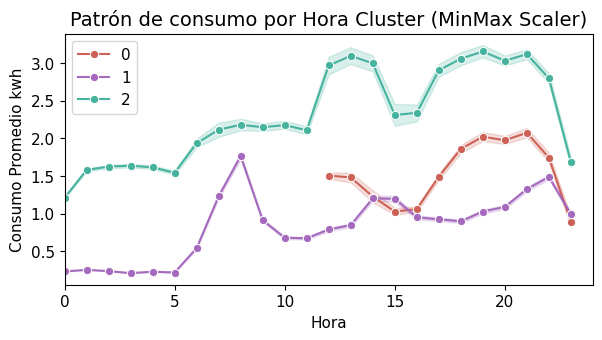

In [ ]:
plt.figure(figsize=(15, 15))
i  = 1
axes = plt.subplot(4, 2, i)
cluster = 'cluster_MM'
cvarGrup = ['hora','cluster_MM','Total Consumo']
dfgSgc = df_cluster_general.copy()
dfgSgc = pd.DataFrame(dfgSgc)
dfgSgc = dfgSgc.reset_index()
dfgSgc = dfgSgc.set_index('hora')

sns.lineplot(ax=axes,data=dfgSgc, x='hora', y='Total Consumo',hue= cluster, marker='o',palette=paleta_cluster)
axes.xaxis.set_tick_params(labelsize=11)
axes.yaxis.set_tick_params(labelsize=11)
axes.legend(fontsize=11)

axes.set_title('Patrón de consumo por Hora Cluster (MinMax Scaler)', fontsize=14)
axes.set_ylabel('Consumo Promedio kwh', fontsize=11)
axes.set_xlabel('Hora', fontsize=11)
sns.set_style("whitegrid")
plt.xlim(0, 24)


(0.0, 24.0)

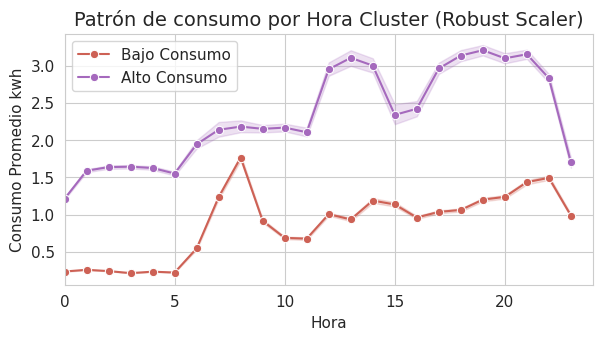

In [ ]:
mapCluster = {
    0: 'Bajo Consumo',
    1: 'Alto Consumo'
}

plt.figure(figsize=(15, 15))
i  = 1
axes = plt.subplot(4, 2, i)
cluster = 'desCluster'
cvarGrup = ['hora','cluster_RS','Total Consumo']
dfgSgc = df_cluster_general.copy()
dfgSgc['desCluster'] = dfgSgc['cluster_RS'].map(mapCluster)
dfgSgc = pd.DataFrame(dfgSgc)
dfgSgc = dfgSgc.reset_index()
dfgSgc = dfgSgc.set_index('hora')

sns.lineplot(ax=axes,data=dfgSgc, x='hora', y='Total Consumo',hue= cluster, marker='o',palette=paleta_desCluster)
axes.xaxis.set_tick_params(labelsize=11)
axes.yaxis.set_tick_params(labelsize=11)
axes.legend(fontsize=11)

axes.set_title('Patrón de consumo por Hora Cluster (Robust Scaler)', fontsize=14)
axes.set_ylabel('Consumo Promedio kwh', fontsize=11)
axes.set_xlabel('Hora', fontsize=11)
sns.set_style("whitegrid")
plt.xlim(0, 24)

In [ ]:
cluster = 'desCluster'
mostrar_estadisticas_por_cluster(dfgSgc,cluster)

Cluster Total Muestra   Total KWh  Promedio KWh  \
0  Cluster Bajo Consumo       305,320  262,048.17      0.858274   
0  Cluster Alto Consumo        50,550  119,341.84      2.360867   

   Desv. estándar KWh  Valor mínimo KWh  Valor máximo KWh  
0            1.289060          0.000104         15.645084  
0            1.628822          0.866000         14.199512

#Cluster Bajo Consumo

## Consumo por Hora

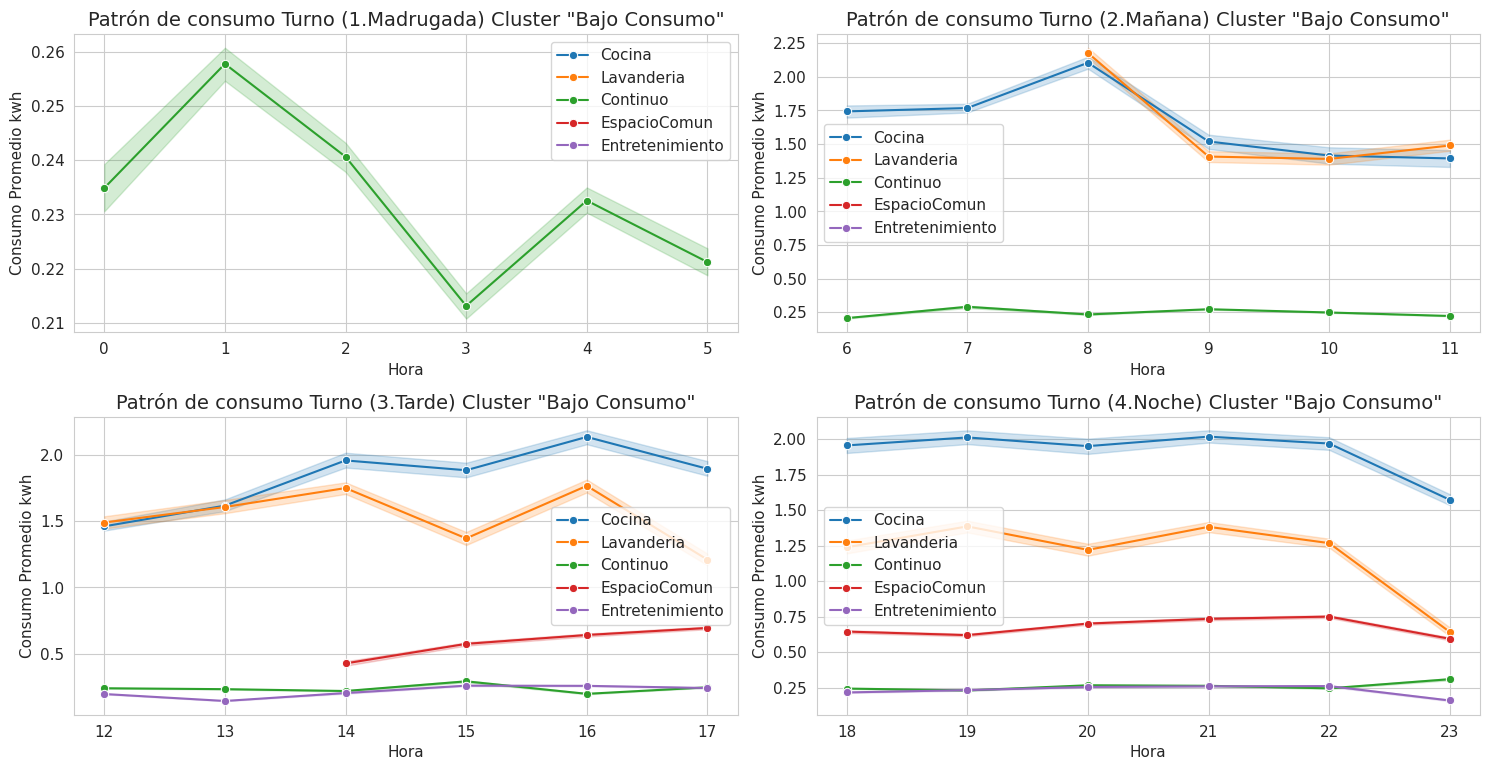

In [ ]:
cluster = 'cluster_RS'
plt.figure(figsize=(15, 15))
i  = 1
for rango in dfgSgc['RangoHorario'].unique():
  axes = plt.subplot(4, 2, i)
  for artefacto in cArtefactos:
    sns.lineplot(data= dfgSgc[(dfgSgc['cluster_RS']==0) & (dfgSgc['RangoHorario']==rango) & (dfgSgc[artefacto]!=0)], x='hora', y=artefacto, marker='o',label = str(artefacto))
  axes.xaxis.set_tick_params(labelsize=11)
  axes.yaxis.set_tick_params(labelsize=11)
  axes.legend(fontsize=11)
  axes.set_title('Patrón de consumo Turno (' + rango + ') Cluster "Bajo Consumo"' , fontsize=14)
  axes.set_ylabel('Consumo Promedio kwh', fontsize=11)
  axes.set_xlabel('Hora', fontsize=11)
  sns.set_style("whitegrid")
  plt.tight_layout()
  i = i + 1

In [ ]:
df_std = dfgSgc[(dfgSgc['cluster_RS']==0)]

df_estadisticas = mostrar_estadisticas_por_artefacto(df_std,cArtefactos,False)
df_estadisticas

Tipo Articulo  Promedio KWh Total Muestra  Total KWh  Desv. estándar KWh  \
0           Cocina      1.828468        45,386  82,986.83            1.252001   
0       Lavanderia      1.433698        50,022  71,716.44            1.256107   
0         Continuo      0.239988       262,233  62,932.89            0.164118   
0     EspacioComun      0.656597        39,021  25,621.08            0.338472   
0  Entretenimiento      0.216635        86,740  18,790.92            0.156696   

   Valor mínimo KWh  Valor máximo KWh  
0          0.000104          8.873316  
0          0.000137          8.507444  
0          0.059000          0.867000  
0          0.005000          1.689500  
0          0.001536          0.604856

In [ ]:
df_std = dfgSgc[(dfgSgc['cluster_RS']==0)]
df_estadisticas = mostrar_estadisticas_por_artefacto(df_std,cArtefactos,True)
df_estadisticas = df_estadisticas.sort_values(by=['Promedio KWh','Tipo Articulo'], ascending=[False, True])
df_estadisticas

Tipo Articulo        Turno  Promedio KWh Total Muestra  Total KWh  \
0           Cocina      4.Noche      1.910699        17,915  34,230.18   
0           Cocina      3.Tarde      1.796707        14,578  26,192.40   
0           Cocina     2.Mañana      1.750117        12,893  22,564.26   
0       Lavanderia     2.Mañana      1.617008        14,094  22,790.11   
0       Lavanderia      3.Tarde      1.535049        17,603  27,021.47   
0       Lavanderia      4.Noche      1.195354        18,325  21,904.86   
0     EspacioComun      4.Noche      0.673850        26,184  17,644.09   
0     EspacioComun      3.Tarde      0.621406        12,837   7,976.99   
0         Continuo      4.Noche      0.252496        68,323  17,251.30   
0         Continuo     2.Mañana      0.241701        58,759  14,202.09   
0  Entretenimiento      4.Noche      0.234452        32,964   7,728.47   
0         Continuo      3.Tarde      0.233789        58,195  13,605.35   
0         Continuo  1.Madrugada      0.232265        76,956  17,874.15   
0  Entretenimiento      3.Tarde      0.205714        53,776  11,062.46   
0           Cocina  1.Madrugada      0.000000             0       0.00   
0  Entretenimiento  1.Madrugada      0.000000             0       0.00   
0  Entretenimiento     2.Mañana      0.000000             0       0.00   
0     EspacioComun  1.Madrugada      0.000000             0       0.00   
0     EspacioComun     2.Mañana      0.000000             0       0.00   
0       Lavanderia  1.Madrugada      0.000000             0       0.00   

   Desv. estándar KWh  Valor mínimo KWh  Valor máximo KWh  
0            1.315361          0.000104          8.873316  
0            1.249942          0.000104          8.760152  
0            1.153629          0.000104          8.545342  
0            1.262961          0.000137          8.140863  
0            1.373672          0.000137          8.507444  
0            1.084060          0.000137          4.312585  
0            0.327341          0.005000          1.689500  
0            0.357552          0.005000          1.689500  
0            0.174870          0.059000          0.866000  
0            0.169772          0.059000          0.862000  
0            0.169091          0.001536          0.604856  
0            0.155424          0.059000          0.867000  
0            0.155338          0.059000          0.862000  
0            0.147529          0.001536          0.604856  
0            0.000000          0.000000          0.000000  
0            0.000000          0.000000          0.000000  
0            0.000000          0.000000          0.000000  
0            0.000000          0.000000          0.000000  
0            0.000000          0.000000          0.000000  
0            0.000000          0.000000          0.000000

## Consumo por día de Semana

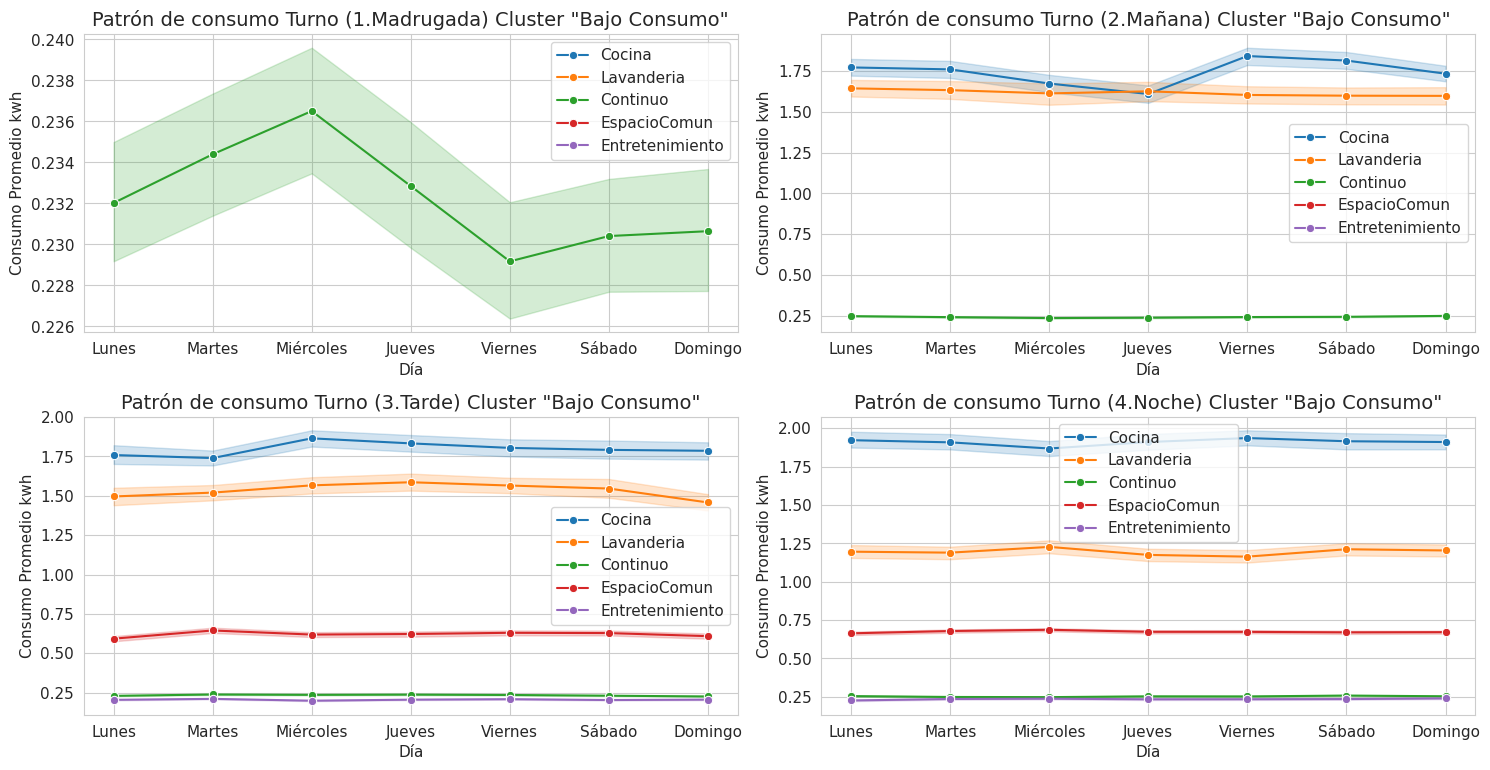

In [ ]:
cluster = 'cluster_RS'
plt.figure(figsize=(15, 15))
i  = 1
for rango in dfgSgc['RangoHorario'].unique():
  axes = plt.subplot(4, 2, i)
  for artefacto in cArtefactos:
    sns.lineplot(data= dfgSgc[(dfgSgc['cluster_RS']==0) & (dfgSgc['RangoHorario']==rango) & (dfgSgc[artefacto]!=0)].sort_values(by=['id_DS']), x='Dia_Semana', y=artefacto, marker='o',label = str(artefacto))
  axes.xaxis.set_tick_params(labelsize=11)
  axes.yaxis.set_tick_params(labelsize=11)
  axes.legend(fontsize=11)
  axes.set_title('Patrón de consumo Turno (' + rango + ') Cluster "Bajo Consumo"' , fontsize=14)
  axes.set_ylabel('Consumo Promedio kwh', fontsize=11)
  axes.set_xlabel('Día', fontsize=11)
  sns.set_style("whitegrid")
  plt.tight_layout()
  i = i + 1

## Consumo por Estación

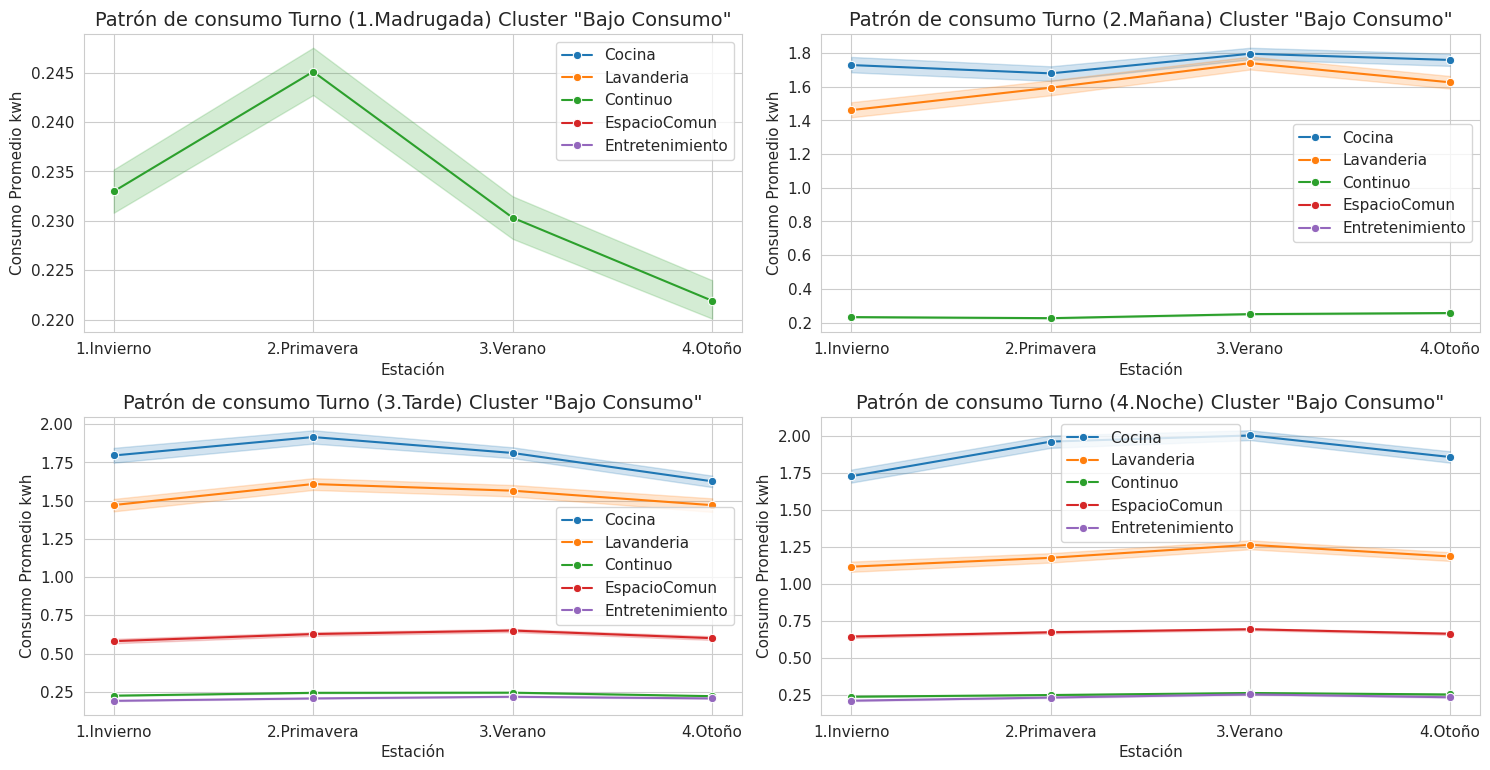

In [ ]:
cluster = 'cluster_RS'
plt.figure(figsize=(15, 15))
i  = 1
for rango in dfgSgc['RangoHorario'].unique():
  axes = plt.subplot(4, 2, i)
  for artefacto in cArtefactos:
    sns.lineplot(data= dfgSgc[(dfgSgc['cluster_RS']==0) & (dfgSgc['RangoHorario']==rango) & (dfgSgc[artefacto]!=0)].sort_values(by=['Estacion']), x='Estacion', y=artefacto, marker='o',label = str(artefacto))
  axes.xaxis.set_tick_params(labelsize=11)
  axes.yaxis.set_tick_params(labelsize=11)
  axes.legend(fontsize=11)
  axes.set_title('Patrón de consumo Turno (' + rango + ') Cluster "Bajo Consumo"' , fontsize=14)
  axes.set_ylabel('Consumo Promedio kwh', fontsize=11)
  axes.set_xlabel('Estación', fontsize=11)
  sns.set_style("whitegrid")
  plt.tight_layout()
  i = i + 1

#Cluster Alto Consumo

## Consumo por Hora

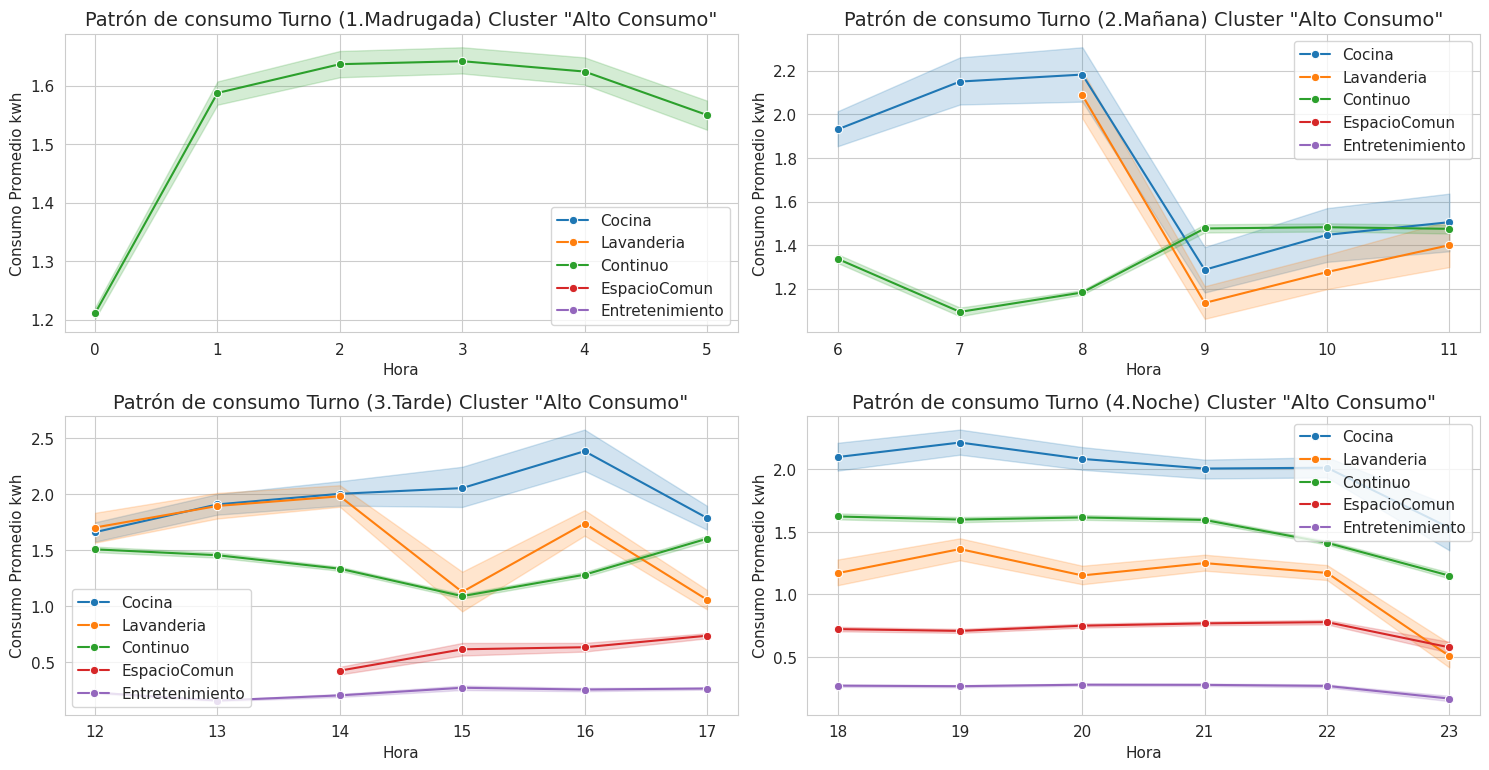

In [ ]:
cluster = 'cluster_RS'
plt.figure(figsize=(15, 15))
i  = 1
for rango in dfgSgc['RangoHorario'].unique():
  axes = plt.subplot(4, 2, i)
  for artefacto in cArtefactos:
    sns.lineplot(data= dfgSgc[(dfgSgc['cluster_RS']==1) & (dfgSgc['RangoHorario']==rango) & (dfgSgc[artefacto]!=0)], x='hora', y=artefacto, marker='o',label = str(artefacto))
  axes.xaxis.set_tick_params(labelsize=11)
  axes.yaxis.set_tick_params(labelsize=11)
  axes.legend(fontsize=11)
  axes.set_title('Patrón de consumo Turno (' + rango + ') Cluster "Alto Consumo"' , fontsize=14)
  axes.set_ylabel('Consumo Promedio kwh', fontsize=11)
  axes.set_xlabel('Hora', fontsize=11)
  sns.set_style("whitegrid")
  plt.tight_layout()
  i = i + 1

In [ ]:
df_std = dfgSgc[(dfgSgc['cluster_RS']==1)]
df_estadisticas = mostrar_estadisticas_por_artefacto(df_std,cArtefactos,True)
df_estadisticas = df_estadisticas.sort_values(by=['Promedio KWh','Tipo Articulo'], ascending=[False, True])
df_estadisticas

Tipo Articulo        Turno  Promedio KWh Total Muestra  Total KWh  \
0           Cocina      4.Noche      2.053412         4,935  10,133.59   
0           Cocina      3.Tarde      1.897984         2,910   5,523.13   
0           Cocina     2.Mañana      1.751442         2,586   4,529.23   
0       Lavanderia      3.Tarde      1.666675         3,225   5,375.03   
0         Continuo      4.Noche      1.541266        15,694  24,188.62   
0         Continuo  1.Madrugada      1.529268        14,169  21,668.20   
0         Continuo      3.Tarde      1.419154         8,881  12,603.50   
0       Lavanderia     2.Mañana      1.386287         2,978   4,128.36   
0         Continuo     2.Mañana      1.384349        11,806  16,343.63   
0       Lavanderia      4.Noche      1.180459         4,743   5,598.92   
0     EspacioComun      4.Noche      0.739491         7,145   5,283.67   
0     EspacioComun      3.Tarde      0.646272         1,583   1,023.05   
0  Entretenimiento      4.Noche      0.269661         6,794   1,832.07   
0  Entretenimiento      3.Tarde      0.215866         5,146   1,110.85   
0           Cocina  1.Madrugada      0.000000             0       0.00   
0  Entretenimiento  1.Madrugada      0.000000             0       0.00   
0  Entretenimiento     2.Mañana      0.000000             0       0.00   
0     EspacioComun  1.Madrugada      0.000000             0       0.00   
0     EspacioComun     2.Mañana      0.000000             0       0.00   
0       Lavanderia  1.Madrugada      0.000000             0       0.00   

   Desv. estándar KWh  Valor mínimo KWh  Valor máximo KWh  
0            1.406298          0.000104          8.876152  
0            1.271939          0.000104          7.413773  
0            1.231148          0.000104          7.330213  
0            1.467978          0.000137          8.507444  
0            0.537806          0.856000          2.774000  
0            0.530947          0.866000          2.887000  
0            0.474173          0.860000          2.774000  
0            1.297366          0.000137          7.038021  
0            0.438822          0.860000          2.774000  
0            1.130865          0.000137          4.312585  
0            0.322463          0.005000          1.689500  
0            0.349423          0.005000          1.689500  
0            0.179891          0.002850          0.604856  
0            0.150199          0.002850          0.604856  
0            0.000000          0.000000          0.000000  
0            0.000000          0.000000          0.000000  
0            0.000000          0.000000          0.000000  
0            0.000000          0.000000          0.000000  
0            0.000000          0.000000          0.000000  
0            0.000000          0.000000          0.000000

## Consumo por día de Semana

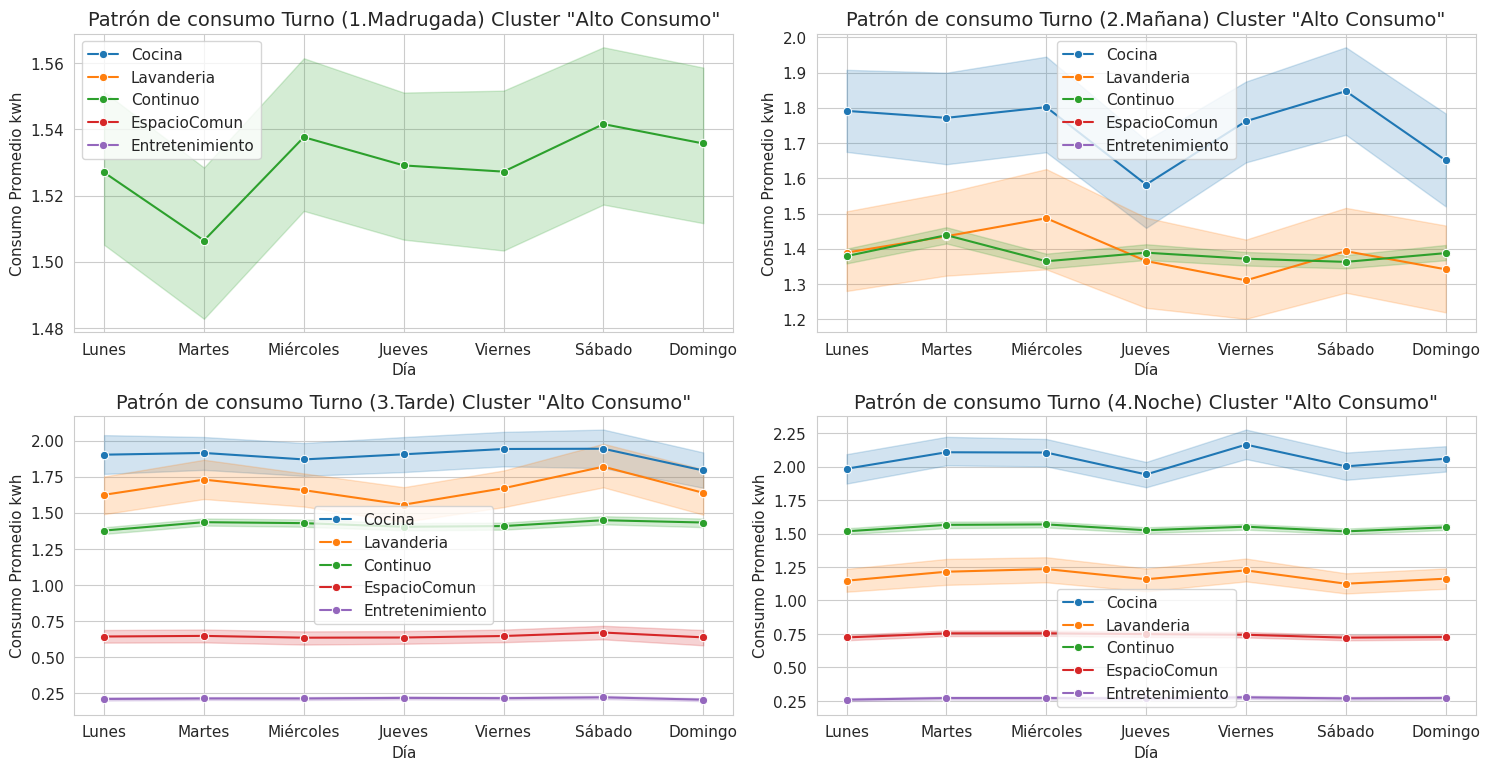

In [ ]:
cluster = 'cluster_RS'
plt.figure(figsize=(15, 15))
i  = 1
for rango in dfgSgc['RangoHorario'].unique():
  axes = plt.subplot(4, 2, i)
  for artefacto in cArtefactos:
    sns.lineplot(data= dfgSgc[(dfgSgc['cluster_RS']==1) & (dfgSgc['RangoHorario']==rango) & (dfgSgc[artefacto]!=0)].sort_values(by=['id_DS']), x='Dia_Semana', y=artefacto, marker='o',label = str(artefacto))
  axes.xaxis.set_tick_params(labelsize=11)
  axes.yaxis.set_tick_params(labelsize=11)
  axes.legend(fontsize=11)
  axes.set_title('Patrón de consumo Turno (' + rango + ') Cluster "Alto Consumo"' , fontsize=14)
  axes.set_ylabel('Consumo Promedio kwh', fontsize=11)
  axes.set_xlabel('Día', fontsize=11)
  sns.set_style("whitegrid")
  plt.tight_layout()
  i = i + 1

## Consumo por Estación

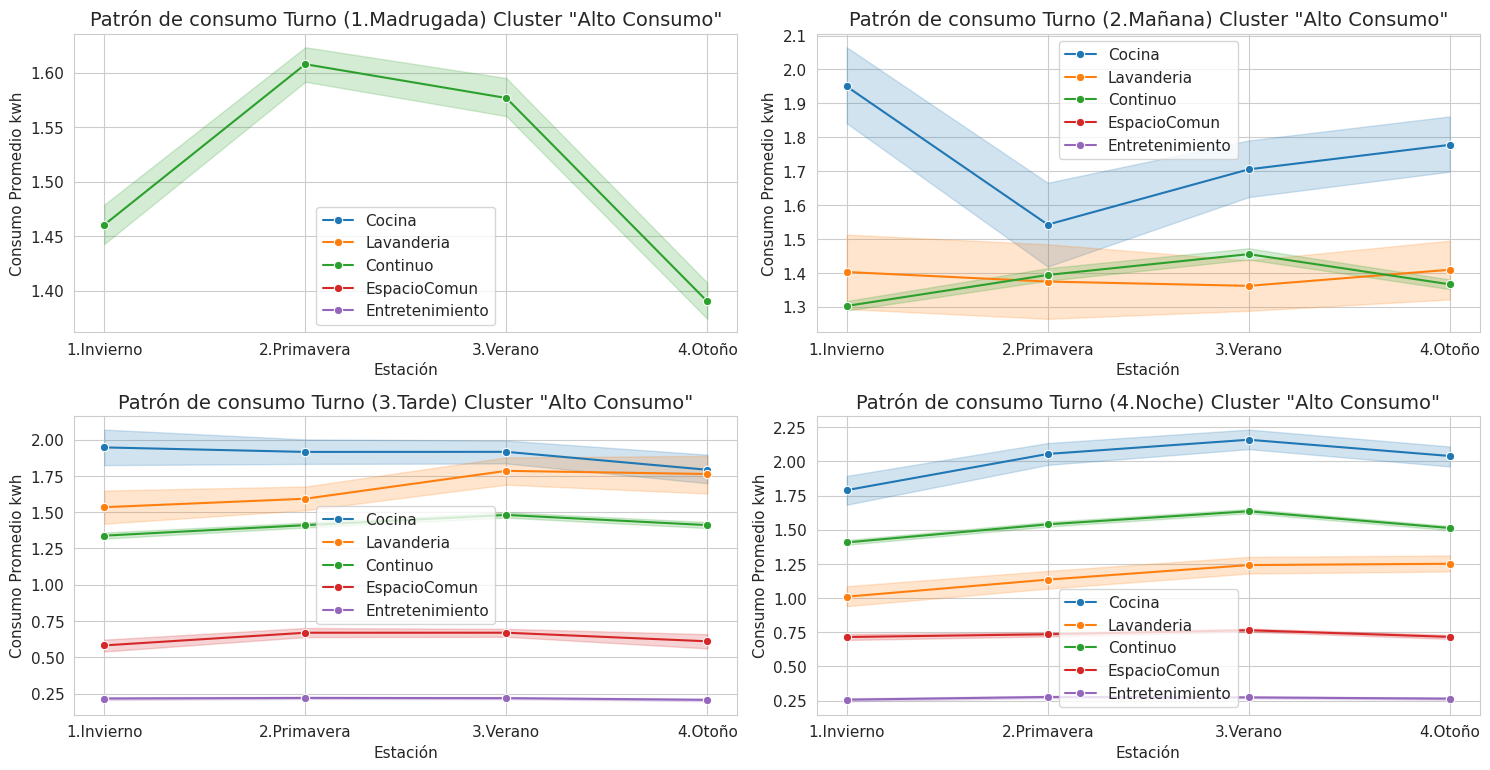

In [ ]:
cluster = 'cluster_RS'
plt.figure(figsize=(15, 15))
i  = 1
for rango in dfgSgc['RangoHorario'].unique():
  axes = plt.subplot(4, 2, i)
  for artefacto in cArtefactos:
    sns.lineplot(data= dfgSgc[(dfgSgc['cluster_RS']==1) & (dfgSgc['RangoHorario']==rango) & (dfgSgc[artefacto]!=0)].sort_values(by=['Estacion']), x='Estacion', y=artefacto, marker='o',label = str(artefacto))
  axes.xaxis.set_tick_params(labelsize=11)
  axes.yaxis.set_tick_params(labelsize=11)
  axes.legend(fontsize=11)
  axes.set_title('Patrón de consumo Turno (' + rango + ') Cluster "Alto Consumo"' , fontsize=14)
  axes.set_ylabel('Consumo Promedio kwh', fontsize=11)
  axes.set_xlabel('Estación', fontsize=11)
  sns.set_style("whitegrid")
  plt.tight_layout()
  i = i + 1

In [ ]:
#from google.colab import files
#dfgSgc.to_csv('Validacion.csv', header=True, index=False)
#files.download('Validacion.csv')

In [25]:
df_cluster_general.dtypes

fecha              datetime64[ns]
Total Consumo             float64
hora                        int64
Consumidor                 object
Dish washer               float64
Washing Machine           float64
Dryer                     float64
Water heater              float64
TV                        float64
Microwave                 float64
Kettle                    float64
Lighting                  float64
Refrigerator              float64
Temp                        int64
Producer                  float64
Is_producer                  bool
RangoHorario               object
t_1.Madrugada                bool
t_2.Mañana                   bool
t_3.Tarde                    bool
t_4.Noche                    bool
Estacion                   object
e_1.Invierno                 bool
e_2.Primavera                bool
e_3.Verano                   bool
e_4.Otoño                    bool
id_DS                       int64
Dia_Semana                 object
NFS                          bool
FDS           

In [49]:
varSerieTmp = 'Total Consumo'
df_prooducer = df_cluster_general[df_cluster_general['Is_producer']==True]
df_prooducer = df_prooducer.groupby(['fecha','Consumidor'])[varSerieTmp].sum()
df_prooducer = pd.DataFrame(df_prooducer)
df_prooducer = df_prooducer.reset_index()
df_prooducer = df_prooducer.groupby(['fecha'])[varSerieTmp].mean()
df_prooducer = pd.DataFrame(df_prooducer)
df_prooducer

Total Consumo
fecha                    
2013-08-01      31.038789
2013-08-02      26.180557
2013-08-03      27.593075
2013-08-04      29.338801
2013-08-05      28.179617
...                   ...
2014-07-28      32.361768
2014-07-29      30.409265
2014-07-30      29.575269
2014-07-31      28.627674
2014-08-01      29.496716

[366 rows x 1 columns]

# Analisis Resultados Serie temporal

In [51]:
dfg = df_prooducer

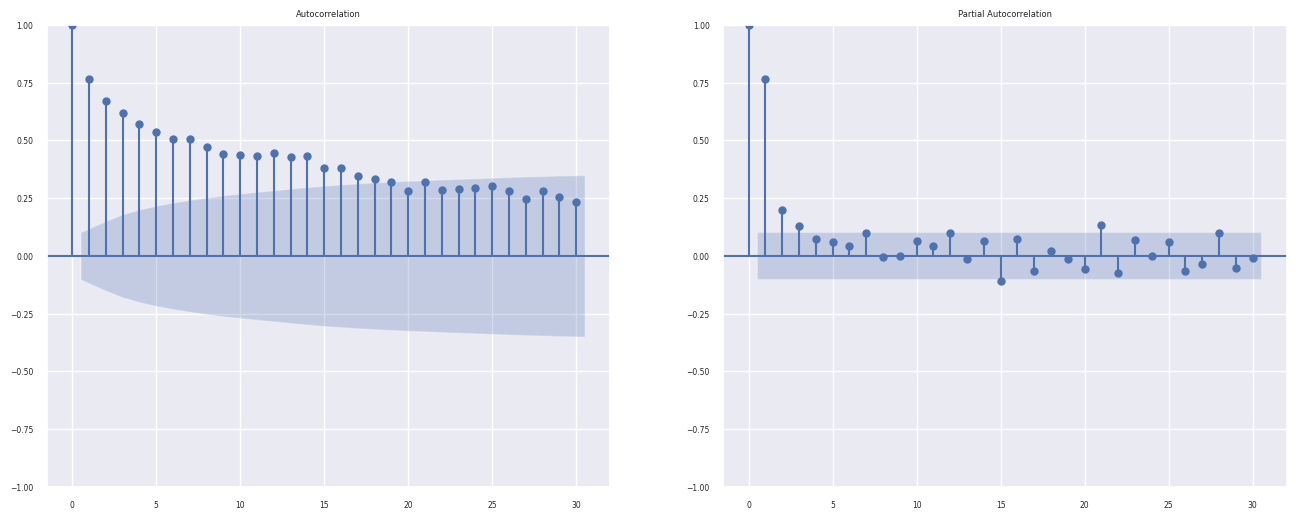

In [56]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Análisis ACF y PACF
varSerieTmp = 'Total Consumo'
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
plot_acf(dfg[varSerieTmp], lags=30, ax=ax[0])
plot_pacf(dfg[varSerieTmp], lags=30, ax=ax[1])
plt.show()

In [66]:
warnings.filterwarnings('ignore')
def evaluate_arima_q(q_value):
    model = ARIMA(dfg, order=(0, 1, q_value))
    model_fit = model.fit()
    residuals = model_fit.resid
    #plot_acf(residuals, lags=30)
    #plt.title(f'ACF de los residuos del modelo ARIMA (0, 1, {q_value})')
    #plt.show()
    return model_fit.aic  # Retornar AIC para comparación

aic_values = {}
for q in range(5):  # Probar valores de q de 0 a 4
    aic = evaluate_arima_q(q)
    aic_values[q] = aic

# Mostrar los valores de AIC para cada q
print(aic_values)

{0: 1866.2998902462741, 1: 1817.304622434294, 2: 1806.863143890565, 3: 1805.3056743615516, 4: 1804.920406522775}


In [67]:
# Función para ajustar ARIMA y graficar PACF de residuos
warnings.filterwarnings('ignore')
def evaluate_arima_p(p_value):
    model = ARIMA(dfg, order=(p_value, 1, 0))
    model_fit = model.fit()
    residuals = model_fit.resid
    #plot_pacf(residuals, lags=30)
    #plt.title(f'PACF de los residuos del modelo ARIMA ({p_value}, 1, 0)')
    #plt.show()
    return model_fit.aic  # Retornar AIC para comparación

# Probar diferentes valores de p
aic_values = {}
for p in range(5):  # Probar valores de p de 0 a 4
    aic = evaluate_arima_p(p)
    aic_values[p] = aic

# Mostrar los valores de AIC para cada p
print(aic_values)


{0: 1866.2998902462741, 1: 1836.4238102977492, 2: 1824.1696897095105, 3: 1820.236511473713, 4: 1817.8401073151122}


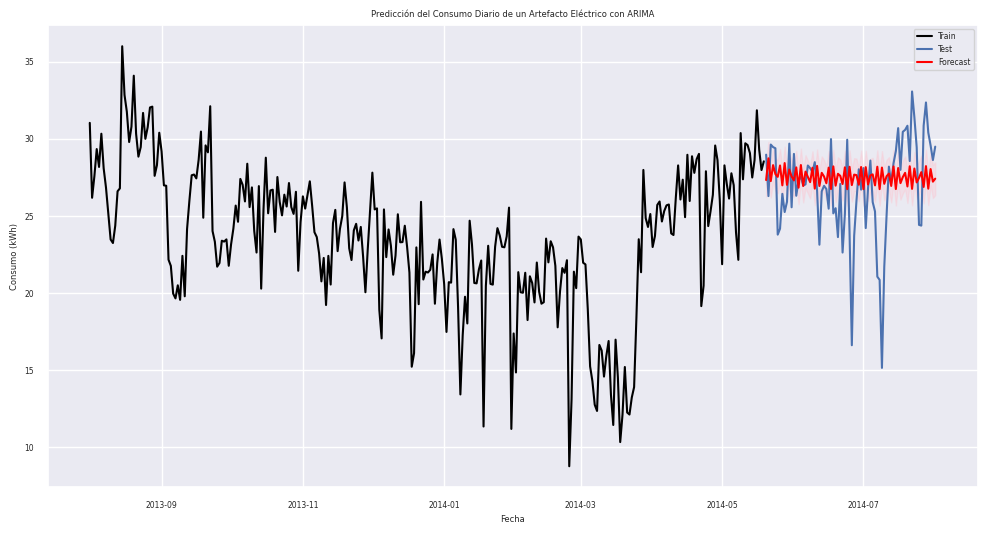

In [68]:
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split

q = 4
p = 4
varSerieTmp = 'Total Consumo'
# Dividir los datos en conjuntos de entrenamiento y prueba
train_size = int(len(dfg) * 0.8)
train, test = dfg[:train_size], dfg[train_size:]

# Ajustar el modelo ARIMA
model = ARIMA(train, order=(p, 1, q))  # (p, d, q) donde p=5, d=1, q=0
model_fit = model.fit()

# Hacer predicciones
forecast = model_fit.forecast(steps=len(test))
forecast_index = test.index

# Visualizar las predicciones
plt.figure(figsize=(12, 6))
plt.plot(train.index, train[varSerieTmp], label='Train', color='black')
plt.plot(test.index, test[varSerieTmp], label='Test')
plt.plot(forecast_index, forecast, label='Forecast', color='red')
plt.fill_between(forecast_index, forecast - 1.96 * np.std(forecast), forecast + 1.96 * np.std(forecast), color='pink', alpha=0.3)
plt.title('Predicción del Consumo Diario de un Artefacto Eléctrico con ARIMA')
plt.xlabel('Fecha')
plt.ylabel('Consumo (kWh)')
plt.legend()
plt.show()

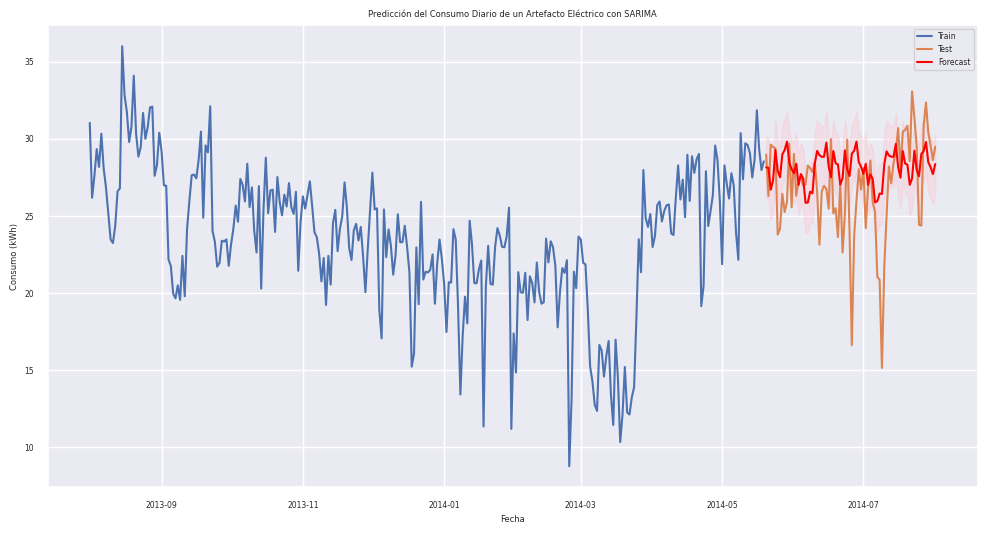

In [69]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento y prueba

q = 4
p = 4

varSerieTmp = 'Total Consumo'
train_size = int(len(dfg) * 0.8)
train, test = dfg[:train_size], dfg[train_size:]

# Ajustar el modelo SARIMA
# Parámetros SARIMA: (p, d, q) x (P, D, Q, s)
# donde s es la periodicidad de la componente estacional (aquí, 30 días aproximadamente un mes)
model = SARIMAX(train, order=(p, 1, q), seasonal_order=(1, 1, 1, 30))
model_fit = model.fit(disp=False)

# Hacer predicciones
forecast = model_fit.forecast(steps=len(test))
forecast_index = test.index

# Visualizar las predicciones
plt.figure(figsize=(12, 6))
plt.plot(train.index, train[varSerieTmp], label='Train')
plt.plot(test.index, test[varSerieTmp], label='Test')
plt.plot(forecast_index, forecast, label='Forecast', color='red')
plt.fill_between(forecast_index, forecast - 1.96 * np.std(forecast), forecast + 1.96 * np.std(forecast), color='pink', alpha=0.3)
plt.title('Predicción del Consumo Diario de un Artefacto Eléctrico con SARIMA')
plt.xlabel('Fecha')
plt.ylabel('Consumo (kWh)')
plt.legend()
plt.show()

# POR DESRROLLAR TODO EL CODIGO QUE VIENE !

# Patron de consumo SubCluster

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

var_corre_select = cArtefactosTemp
cluster = 'cluster_RS' #df_consumidorRS[cArtefactosTemp]

df_cluster_BC = df_cluster_general[df_cluster_general['cluster_RS']==0].copy()
df_cluster_BC_RS = df_cluster_general_rs[df_cluster_general_rs['cluster_RS']==0].copy()

pcaRS = PCA(n_components=2)
X_pcaRS = pcaRS.fit_transform(df_cluster_BC_RS[var_corre_select])

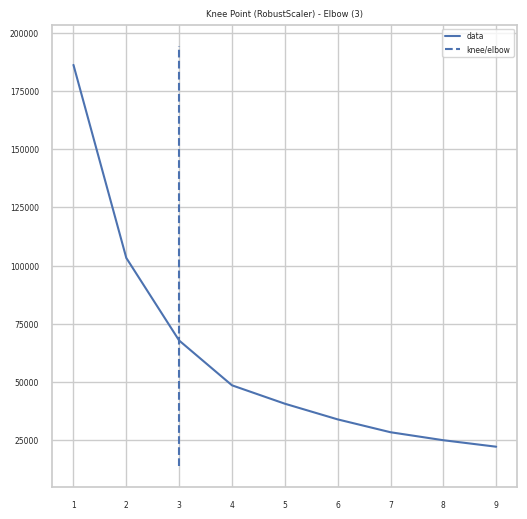

In [ ]:
axes = []
vModelos = ['RobustScaler']
elbowMod = []
pPosMod = 0

#vVar_corre.remove('Refrigerator')

for vModelo in vModelos:
  df_out = []
  if vModelo == 'MinMaxScaler':
    df_kmeans = X_pcaMM
  if vModelo == 'RobustScaler':
    df_kmeans = X_pcaRS

  num_clusters = range(1,10)
  wcss=[]
  for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(df_kmeans)
    wcss_iter = kmeans.inertia_
    wcss.append (wcss_iter)

  kneedle = kneed.KneeLocator(num_clusters, wcss, curve='convex', direction='decreasing')
  elbow_point = kneedle.elbow
  elbowMod.append(elbow_point)
  #print('Elbow: ', elbow_point)
  kneedle.plot_knee(title ='Knee Point (' + vModelo + ') - Elbow (' + elbow_point.astype(str) + ')')

In [ ]:
kmeansRobusS = KMeans(n_clusters=elbowMod[0], random_state=42)
X = X_pcaRS
labels = kmeansRobusS.fit_predict(X)
#kmeansRobusS.fit(X_pcaRS)
df_cluster_BC['sub_cluster_RS'] = labels
df_cluster_BC_RS['sub_cluster_RS'] = labels

Text(0, 0.5, 'PCA 2')

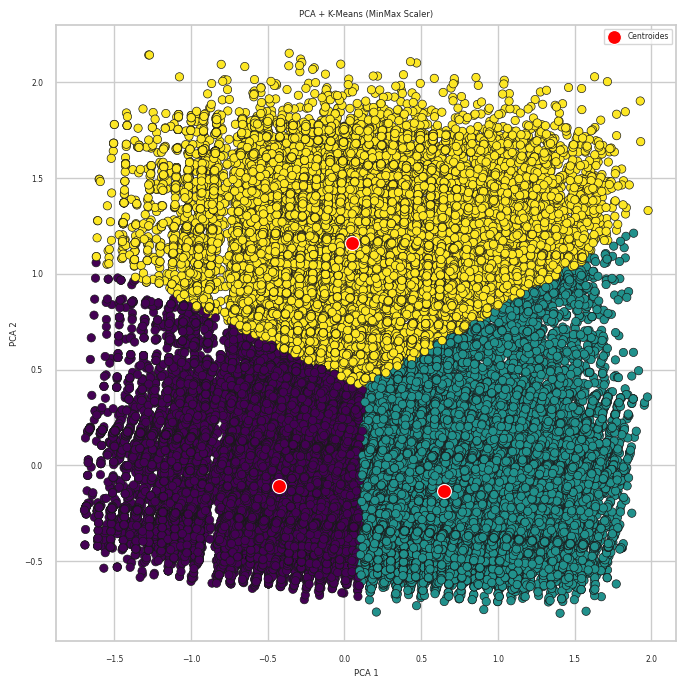

In [ ]:
plargo = 8
pancho = 8
axes = []
vpostPlot=0

axes.append(plt.subplots)
fig1, axes[vpostPlot] = plt.subplots(1,1, figsize=(pancho,plargo))

vposCol = 0
X_pacGraph = X_pcaRS
k_meansGraph = kmeansRobusS
sns.scatterplot(ax=axes[vpostPlot], x= X_pacGraph[:, 0], y= X_pacGraph[:, 1], c=k_meansGraph.labels_, cmap='viridis', marker='o', edgecolors='k')
sns.scatterplot(ax=axes[vpostPlot], x= k_meansGraph.cluster_centers_[:, 0], y= k_meansGraph.cluster_centers_[:, 1], s=100, c='red', marker='o', label='Centroides')
axes[vpostPlot].set_title('PCA + K-Means (MinMax Scaler)')
axes[vpostPlot].set_xlabel('PCA 1')
axes[vpostPlot].set_ylabel('PCA 2')



(0.0, 24.0)

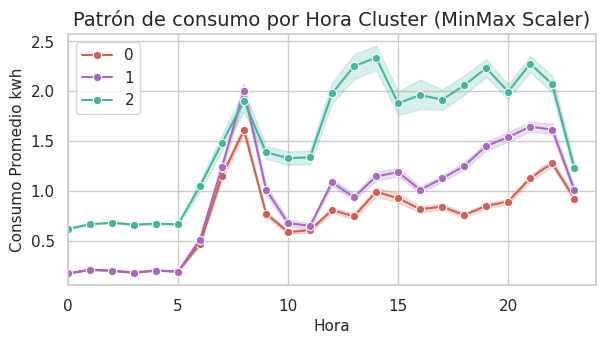

In [ ]:

plt.figure(figsize=(15, 15))
i  = 1
axes = plt.subplot(4, 2, i)
cluster = 'sub_cluster_RS'
cvarGrup = ['hora','sub_cluster_RS','Total Consumo']
#dfgSgc = df_consumidor[cvarGrup].groupby(['hora','cluster']).mean()
dfgSgc = df_cluster_BC.copy()
dfgSgc = pd.DataFrame(dfgSgc)
dfgSgc = dfgSgc.reset_index()
dfgSgc = dfgSgc.set_index('hora')

sns.lineplot(ax=axes,data=dfgSgc, x='hora', y='Total Consumo',hue= cluster, marker='o',palette=paleta_cluster)
axes.xaxis.set_tick_params(labelsize=11)
axes.yaxis.set_tick_params(labelsize=11)
axes.legend(fontsize=11)

axes.set_title('Patrón de consumo por Hora Cluster (MinMax Scaler)', fontsize=14)
axes.set_ylabel('Consumo Promedio kwh', fontsize=11)
axes.set_xlabel('Hora', fontsize=11)
sns.set_style("whitegrid")
plt.xlim(0, 24)

In [ ]:
cluster = 'sub_cluster_RS'
mostrar_estadisticas_por_cluster(dfgSgc,cluster)

Cluster Total Muestra   Total KWh  Promedio KWh  Desv. estándar KWh  \
0       1       109,247  105,841.16      0.968824            1.404167   
0       2        27,899   43,046.18      1.542929            1.509077   
0       0       168,174  113,160.83      0.672879            1.112705   

   Valor mínimo KWh  Valor máximo KWh  
0          0.000104         15.645084  
0          0.413000         13.160557  
0          0.000125         14.270746

In [ ]:
dfgSgc['sub_cluster_RS'].unique()

array([1, 2, 0], dtype=int32)

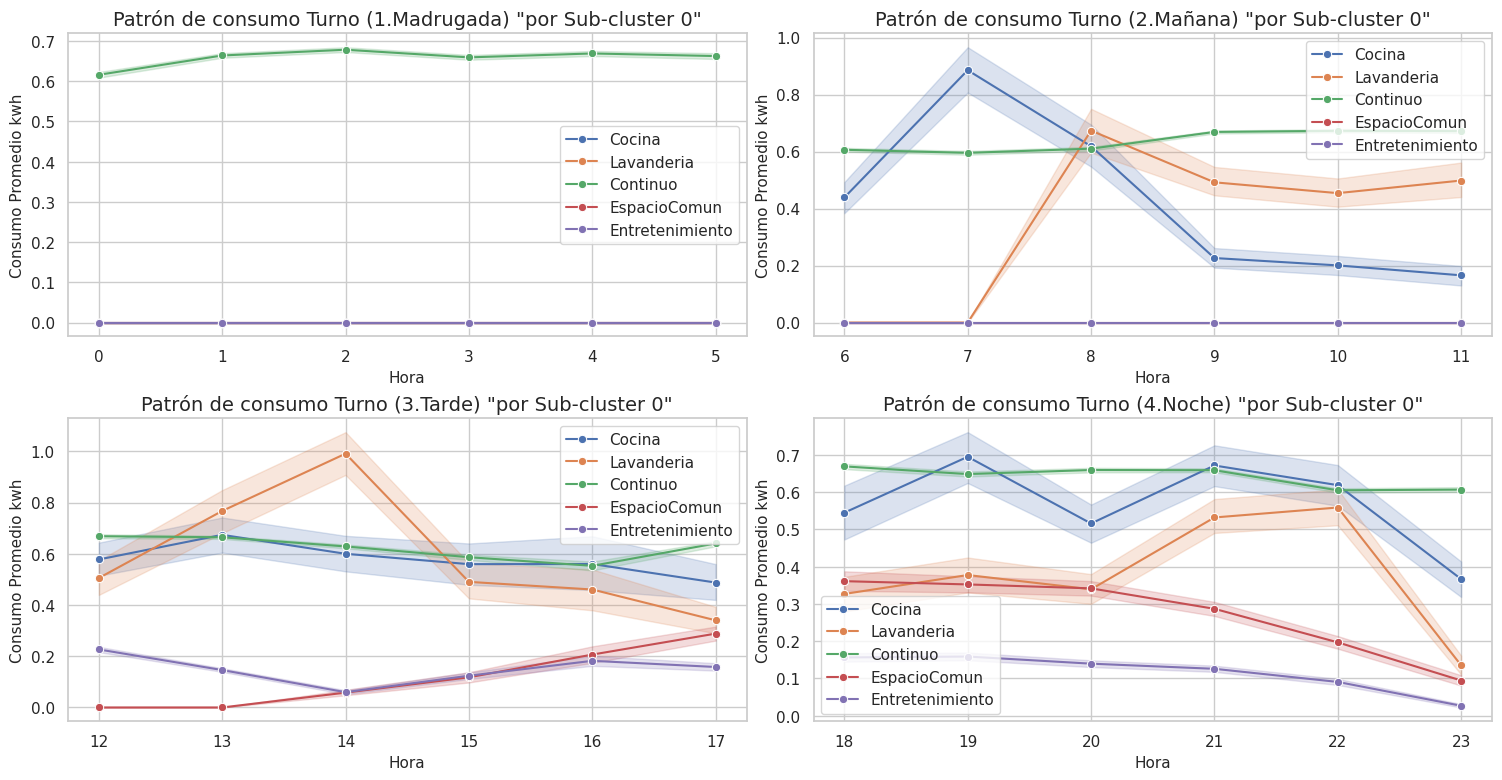

In [ ]:
cluster = 'sub_cluster_RS'
plt.figure(figsize=(15, 15))
i  = 1
for rango in dfgSgc['RangoHorario'].unique():
  axes = plt.subplot(4, 2, i)
  for artefacto in cArtefactos:
    sns.lineplot(data= dfgSgc[(dfgSgc['sub_cluster_RS']==2) & (dfgSgc['RangoHorario']==rango)], x='hora', y=artefacto, marker='o',label = str(artefacto))
  axes.xaxis.set_tick_params(labelsize=11)
  axes.yaxis.set_tick_params(labelsize=11)
  axes.legend(fontsize=11)
  axes.set_title('Patrón de consumo Turno (' + rango + ') "por Sub-cluster 0"' , fontsize=14)
  axes.set_ylabel('Consumo Promedio kwh', fontsize=11)
  axes.set_xlabel('Hora', fontsize=11)
  sns.set_style("whitegrid")
  plt.tight_layout()
  i = i + 1

In [ ]:
sns.barplot(data=dfgSgc, x='Cocina', y='Consumo', ci=None)

#Resumen de consumo por turno y cluster

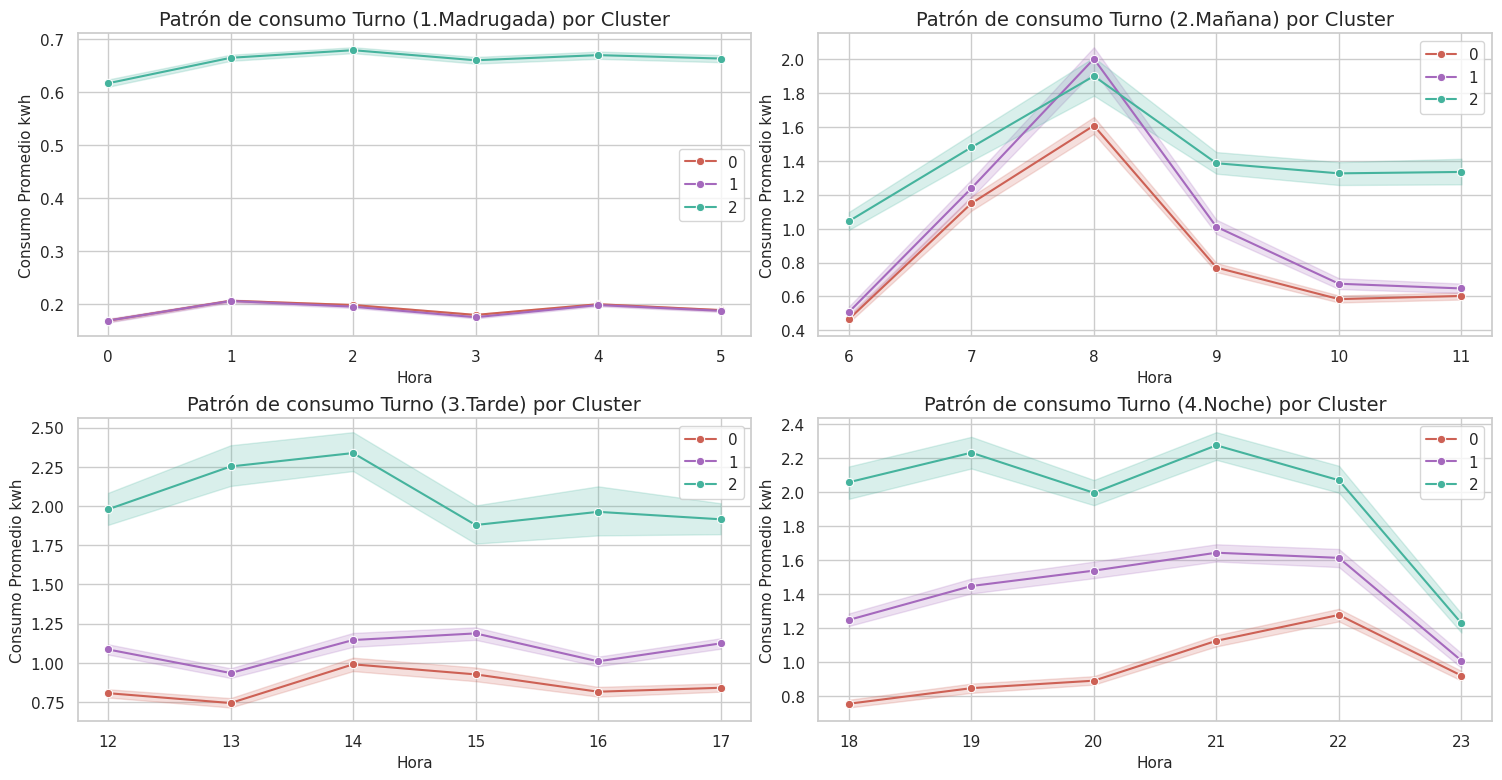

In [ ]:
cluster = 'sub_cluster_RS'
plt.figure(figsize=(15, 15))
i  = 1
for rango in df_consumidor['RangoHorario'].unique():
  axes = plt.subplot(4, 2, i)
  dfgSgc = df_pca_cluster_0[df_pca_cluster_0['RangoHorario'] == rango].copy()
  #dfgSgc = df_consumidor[df_consumidor['RangoHorario'] == rango].copy()
  dfgSgc = pd.DataFrame(dfgSgc)
  dfgSgc = dfgSgc.reset_index()
  dfgSgc = dfgSgc.set_index('hora')
  sns.lineplot(ax=axes,data=dfgSgc, x='hora', y='Total Consumo',hue=cluster, marker='o',palette=paleta_cluster)

  axes.xaxis.set_tick_params(labelsize=11)
  axes.yaxis.set_tick_params(labelsize=11)
  axes.legend(fontsize=11)
  axes.set_title('Patrón de consumo Turno (' + rango + ') por Cluster', fontsize=14)
  axes.set_ylabel('Consumo Promedio kwh', fontsize=11)
  axes.set_xlabel('Hora', fontsize=11)
  sns.set_style("whitegrid")
  plt.tight_layout()
  i = i + 1

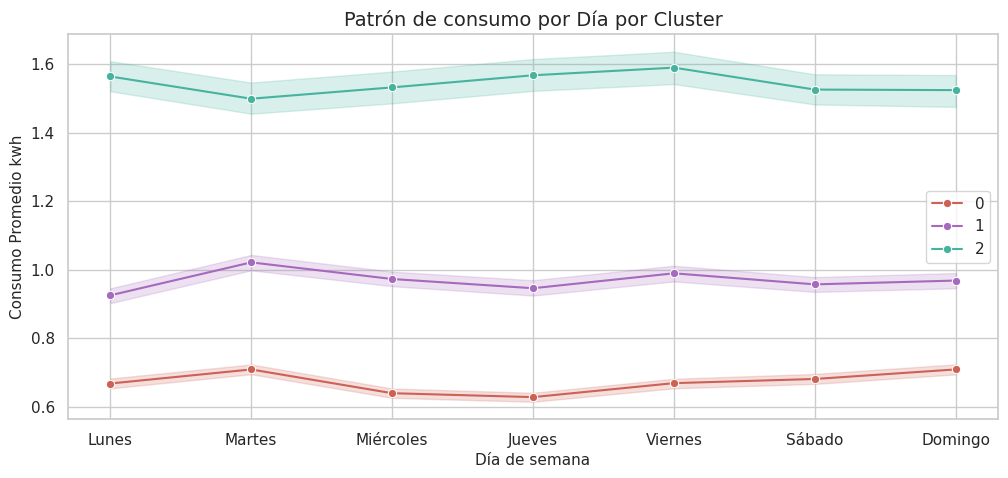

In [ ]:
cluster = 'sub_cluster_RS'
cvarGrup = ['hora','sub_cluster_RS','Total Consumo']
#dfgSgc = df_consumidor[cvarGrup].groupby(['hora','cluster']).mean()
dfgSgc = df_pca_cluster_0.sort_values(by='id_DS').copy()
#dfgSgc = df_consumidor.sort_values(by='id_DS').copy()
dfgSgc = pd.DataFrame(dfgSgc)
dfgSgc = dfgSgc.reset_index()
dfgSgc = dfgSgc.set_index('Dia_Semana')

fig1, axes = plt.subplots(1,1, figsize=(12,5))
sns.lineplot(ax=axes,data=dfgSgc, x='Dia_Semana', y='Total Consumo',hue=cluster, marker='o',palette=paleta_cluster)

axes.xaxis.set_tick_params(labelsize=11)
axes.yaxis.set_tick_params(labelsize=11)
axes.legend(fontsize=11)
axes.set_title('Patrón de consumo por Día por Cluster', fontsize=14)
axes.set_ylabel('Consumo Promedio kwh', fontsize=11)
axes.set_xlabel('Día de semana', fontsize=11)
sns.set_style("whitegrid")

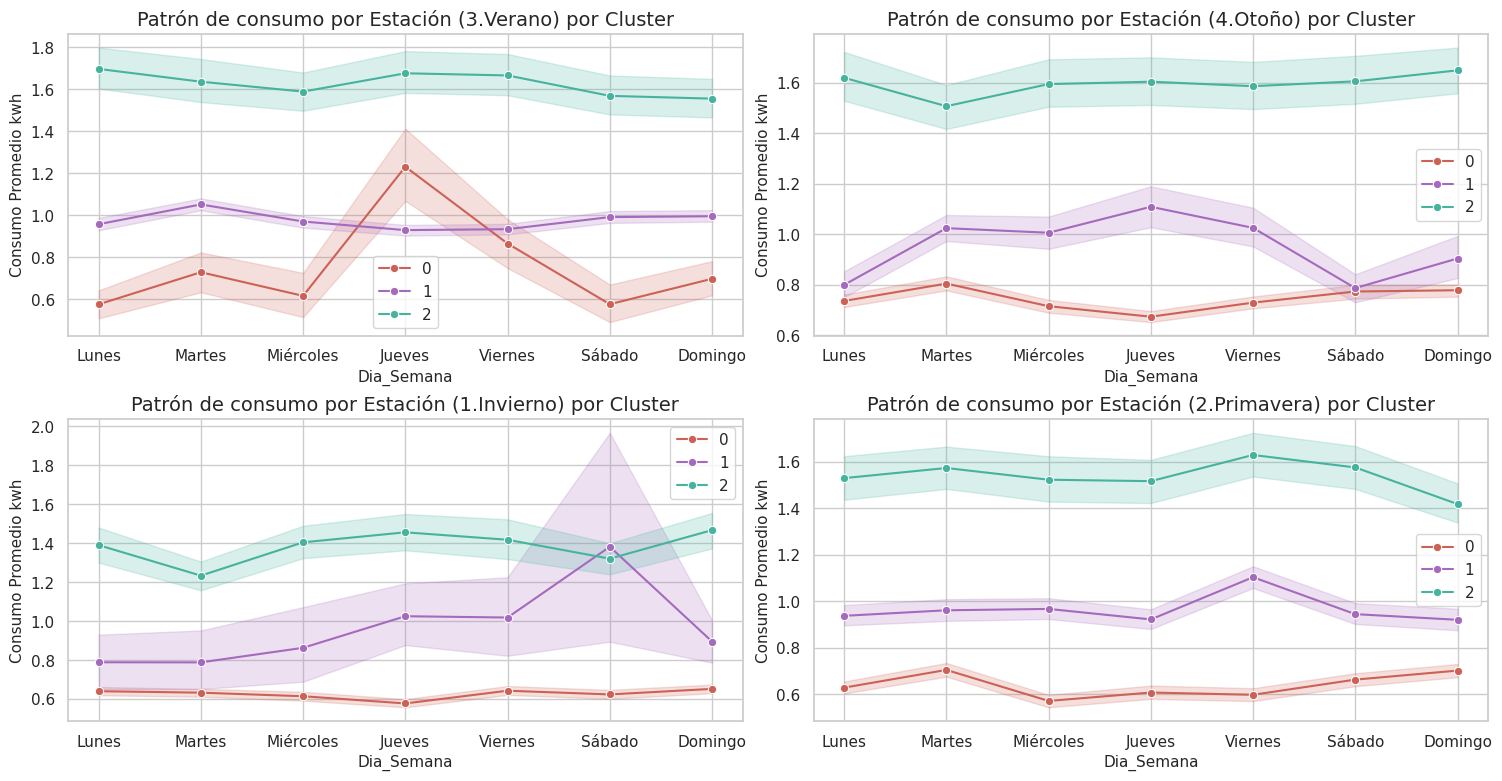

In [ ]:
cluster = 'sub_cluster_RS'
plt.figure(figsize=(15, 15))
i  = 1
for estacion in df_pca_cluster_0['Estacion'].unique():
  axes = plt.subplot(4, 2, i)
  dfgSgc = df_pca_cluster_0[df_pca_cluster_0['Estacion'] == estacion].sort_values(by='id_DS').copy()
  dfgSgc = pd.DataFrame(dfgSgc)
  dfgSgc = dfgSgc.reset_index()
  dfgSgc = dfgSgc.set_index('Dia_Semana')
  sns.lineplot(ax=axes,data=dfgSgc, x='Dia_Semana', y='Total Consumo',hue=cluster, marker='o',palette=paleta_cluster)
  axes.xaxis.set_tick_params(labelsize=11)
  axes.yaxis.set_tick_params(labelsize=11)
  axes.legend(fontsize=11)
  axes.set_title('Patrón de consumo por Estación (' + estacion + ') por Cluster', fontsize=14)
  axes.set_ylabel('Consumo Promedio kwh', fontsize=11)
  axes.set_xlabel('Dia_Semana', fontsize=11)
  sns.set_style("whitegrid")
  plt.tight_layout()

  i = i + 1